In [1]:
# Import libraries

import numpy as np
import pandas as pd
from math import pi

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

using pandas to read the clean csv file

In [82]:
# Read the downloaded file

df = pd.read_csv("listings_clean.csv", na_values=' ')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,37619286,Double Pod Capsule in Mixed Dorm,87731750,Gap Year,Central Region,Kallang,1.31505,103.86022,Shared room,56,1,1,2019-08-13,1.00,8,121
3530,37690516,cozy Condominium in quite neighbourhoods,165475492,BOONChean,Central Region,Toa Payoh,1.34063,103.88219,Private room,60,1,1,2019-08-12,1.00,1,1
3531,37798739,near Clementi MRT female only,157856583,Elyssa,West Region,Clementi,1.30677,103.76224,Private room,56,1,1,2019-08-17,1.00,1,120
3532,37841266,Sunny Modern Condo in City Center walk to MRT,39207304,Sophie,Central Region,Rochor,1.30074,103.84742,Entire home/apt,237,7,1,2019-08-25,1.00,12,159


There are 16 columns in total but we need only numerical values for our model.

In [83]:
# Display the number of rows & columns

df.shape

(3534, 16)

In [84]:
# Display the dataframe info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3534 non-null   int64  
 1   name                            3534 non-null   object 
 2   host_id                         3534 non-null   int64  
 3   host_name                       3534 non-null   object 
 4   neighbourhood_group             3534 non-null   object 
 5   neighbourhood                   3534 non-null   object 
 6   latitude                        3534 non-null   float64
 7   longitude                       3534 non-null   float64
 8   room_type                       3534 non-null   object 
 9   price                           3534 non-null   int64  
 10  minimum_nights                  3534 non-null   int64  
 11  number_of_reviews               3534 non-null   int64  
 12  last_review                     35

In [85]:
# Display the missing values

df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [86]:
# Listing the columns

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### drop the columns which have string values

dropping all the columns which do not have numerical values

In [87]:
df_dropped = df.drop(['id', 'host_id', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], axis=1)

In [88]:
df_dropped

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1.44255,103.79580,83,180,1,0.01,2,365
1,1.33235,103.78521,81,90,18,0.28,1,365
2,1.44246,103.79667,69,6,20,0.20,2,365
3,1.34541,103.95712,206,1,14,0.15,9,353
4,1.34567,103.95963,94,1,22,0.22,9,355
...,...,...,...,...,...,...,...,...
3529,1.31505,103.86022,56,1,1,1.00,8,121
3530,1.34063,103.88219,60,1,1,1.00,1,1
3531,1.30677,103.76224,56,1,1,1.00,1,120
3532,1.30074,103.84742,237,7,1,1.00,12,159


In [102]:
df_dropped.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

using standard scaler to scale the values, therefore, now mean is 0 and standard deviation is 1

In [93]:
from sklearn.preprocessing import StandardScaler

In [144]:
df_dropped[['price', 'reviews_per_month']]

,price,reviews_per_month
0,83,0.01
1,81,0.28
2,69,0.20
3,206,0.15
4,94,0.22
...,...,...
3529,56,1.00
3530,60,1.00
3531,56,1.00
3532,237,1.00


https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe

In [145]:
features_df = pd.DataFrame(df_dropped[['price', 'reviews_per_month']])
cols_names=['price', 'reviews_per_month']
features = features_df[cols_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [114]:
df_dropped.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [148]:
scaled_features=pd.DataFrame(features, columns = cols_names)

In [149]:
scaled_features

,price,reviews_per_month
0,-0.788387,-0.824329
1,-0.827384,-0.612324
2,-1.061366,-0.675140
3,1.609928,-0.714400
4,-0.573904,-0.659436
...,...,...
3529,-1.314846,-0.046977
3530,-1.236853,-0.046977
3531,-1.314846,-0.046977
3532,2.214382,-0.046977


Replacing previous columns in the dataset with the converted values through using Standard Scalar

In [151]:
df_dropped[['price', 'reviews_per_month']]=scaled_features[['price', 'reviews_per_month']]

In [152]:
df_dropped

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1.44255,103.79580,-0.788387,180,1,-0.824329,2,365
1,1.33235,103.78521,-0.827384,90,18,-0.612324,1,365
2,1.44246,103.79667,-1.061366,6,20,-0.675140,2,365
3,1.34541,103.95712,1.609928,1,14,-0.714400,9,353
4,1.34567,103.95963,-0.573904,1,22,-0.659436,9,355
...,...,...,...,...,...,...,...,...
3529,1.31505,103.86022,-1.314846,1,1,-0.046977,8,121
3530,1.34063,103.88219,-1.236853,1,1,-0.046977,1,1
3531,1.30677,103.76224,-1.314846,1,1,-0.046977,1,120
3532,1.30074,103.84742,2.214382,7,1,-0.046977,12,159


In [121]:
#df_scaled['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']=features


In [122]:
#features

Splitting the data into 70:30, 70% is the training data and the rest is testing.

In [153]:
x_train, x_test, y_train, y_test = train_test_split(df_dropped.drop('price', axis=1), df_dropped.price, test_size=0.3)

In [154]:
x_train.shape

(2473, 7)

In [155]:
x_test.shape
y_train.shape

(2473,)

Defining the model

In [156]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [157]:
lr.fit(x_train, y_train)

LinearRegression()

predicting the values of prices

In [158]:
y_prediction=lr.predict(x_test)

The plot compares Actual vs Predicted values

In [159]:
df=pd.DataFrame({'Actual':np.round(y_test, 0), 'Predicted':np.round(y_prediction, 0)})

In [160]:
df

,Actual,Predicted
3145,0.0,0.0
870,-0.0,0.0
191,1.0,0.0
1179,1.0,0.0
2368,-1.0,-0.0
...,...,...
2844,1.0,0.0
3059,-1.0,-0.0
1490,2.0,0.0
1202,-1.0,-0.0


In [162]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [163]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_prediction)

0.9211585253697794

In [173]:
import matplotlib.pyplot as plt

https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html

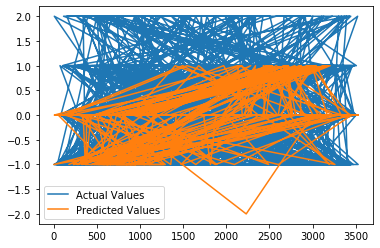

In [178]:
plt.plot(df['Actual'], label='Actual Values')
plt.plot(df['Predicted'], label='Predicted Values')
plt.legend()

https://seaborn.pydata.org/generated/seaborn.lineplot.html

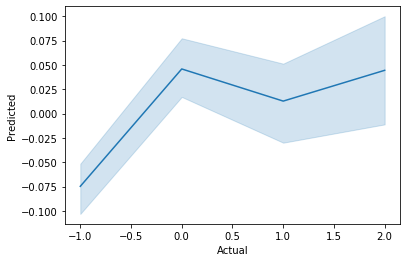

In [179]:
sns.lineplot(data=df, x='Actual', y='Predicted')